<font size="5"> **Model Analysis** </font>

In [1]:
%%capture
%run 04_alphaml_feat_eng.ipynb

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from scipy.stats import spearmanr

In [3]:
from mle_quant_utils import mle_utils
import project_7_helper as project_helper

In [4]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)
sns.set_context("talk")

In [5]:
splits = cfg['models']['alpha_ml']['splits']

# Data Partitioning

Train/Valid/Test must be partitioned taking into account two facts:
* Data is time series
* Do not split a single day in two

```python
def train_valid_test_split(all_x, all_y, train_size, valid_size, test_size):
    """
    Generate the train, validation, and test dataset. TimeSeries splitting
    Returns
    -------
    x_train, x_valid, x_test: DataFrame (MultiIndex)
    y_train, y_valid, y_test: Pandas Series (MultiIndex)
    """
```

In [6]:
X_train, X_valid, X_test, y_train, y_valid, y_test = mle_utils.train_valid_test_split(all_factors, targets_df['target'],
                                                                                      splits['train'], splits['valid'], splits['test'])


In [7]:
train_pevent = y_train.mean()
train_pevent = y_train.mean()

In [8]:
len(X_train)

216949

In [9]:
len(X_valid)

72618

In [10]:
pd.concat([X_train.head(2), X_train.tail(2)], axis=0)

Mean_Reversion_Sector_Neutral_Smoothed  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                                    -0.795709   
                          Equity(1 [AAL])                                   0.558847   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])                                1.178810   
                          Equity(490 [ZTS])                                 1.453624   

                                              Momentum_1YR_Smoothed  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                   -1.230279   
                          Equity(1 [AAL])                  1.713471   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])              -1.237705   
                          Equity(490 [ZTS])               -0.732370   

                                              Overnight_Sentiment_Smoothed  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                          -1.301799   
                          Equity(1 [AAL])                        -1.632765   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])                     -1.577855   
                          Equity(490 [ZTS])                       0.129097   

                                              adv_120d   adv_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])       1.338573  1.397411   
                          Equity(1 [AAL])     1.139994  1.081155   
2014-10-22 00:00:00+00:00 Equity(489 [ZION]) -0.803272 -0.839132   
                          Equity(490 [ZTS])  -0.150613  0.200818   

                                              dispersion_120d  dispersion_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])              0.013270        0.011178   
                          Equity(1 [AAL])            0.013270        0.011178   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])         0.011441        0.013175   
                          Equity(490 [ZTS])          0.011441        0.013175   

                                              market_vol_120d  market_vol_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])              0.127654        0.135452   
                          Equity(1 [AAL])            0.127654        0.135452   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])         0.108303        0.193142   
                          Equity(490 [ZTS])          0.108303        0.193142   

                                              volatility_120d    ...      \
2013-01-03 00:00:00+00:00 Equity(0 [A])             -0.836546    ...       
                          Equity(1 [AAL])            1.639924    ...       
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        -0.215162    ...       
                          Equity(490 [ZTS])         -0.889336    ...       

                                              sector_code_10  qtr_1  qtr_2  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                    0      1      0   
                          Equity(1 [AAL])                  0      1      0   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])               0      0      0   
                          Equity(490 [ZTS])                0      0      0   

                                              qtr_3  qtr_4  weekday_0  \
2013-01-03 00:00:00+00:00 Equity(0 [A])           0      0          0   
                          Equity(1 [AAL])         0      0          0   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])      0      1          0   
                          Equity(490 [ZTS])       0      1          0   

                                              weekday_1  weekday_2  weekday_3  \
2013-01-03 00:00:00+00:00 Equity(0 [A])               0          0          1   
                          Equity(1 [AAL])             0          0          1   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])          0          1          0   
                          Equity(490 [ZTS])           0          1          0   

                                              weekday_4  
2013-01-03 00:00:00+00:00 Equity(0 [A])               0  
                          Equity(1 [AAL])    

In [11]:
pd.concat([X_valid.head(2), X_valid.tail(2)], axis=0)

Mean_Reversion_Sector_Neutral_Smoothed  \
2014-10-22 00:00:00+00:00 Equity(0 [A])                                    -0.773820   
                          Equity(1 [AAL])                                  -1.706743   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])                               -0.172845   
                          Equity(490 [ZTS])                                -1.490791   

                                              Momentum_1YR_Smoothed  \
2014-10-22 00:00:00+00:00 Equity(0 [A])                   -1.171792   
                          Equity(1 [AAL])                  1.640508   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])              -0.862389   
                          Equity(490 [ZTS])                1.415482   

                                              Overnight_Sentiment_Smoothed  \
2014-10-22 00:00:00+00:00 Equity(0 [A])                           1.671092   
                          Equity(1 [AAL])                         0.473357   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])                     -0.942809   
                          Equity(490 [ZTS])                       1.121371   

                                              adv_120d   adv_20d  \
2014-10-22 00:00:00+00:00 Equity(0 [A])       1.405725  1.298144   
                          Equity(1 [AAL])     1.441586  1.477446   
2015-05-28 00:00:00+00:00 Equity(489 [ZION]) -1.092801 -1.321361   
                          Equity(490 [ZTS])   0.249987  0.435692   

                                              dispersion_120d  dispersion_20d  \
2014-10-22 00:00:00+00:00 Equity(0 [A])              0.011441        0.013175   
                          Equity(1 [AAL])            0.011441        0.013175   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])         0.012598        0.011610   
                          Equity(490 [ZTS])          0.012598        0.011610   

                                              market_vol_120d  market_vol_20d  \
2014-10-22 00:00:00+00:00 Equity(0 [A])              0.108303        0.193142   
                          Equity(1 [AAL])            0.108303        0.193142   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])         0.129685        0.108716   
                          Equity(490 [ZTS])          0.129685        0.108716   

                                              volatility_120d    ...      \
2014-10-22 00:00:00+00:00 Equity(0 [A])             -0.552249    ...       
                          Equity(1 [AAL])            1.678264    ...       
2015-05-28 00:00:00+00:00 Equity(489 [ZION])         0.642824    ...       
                          Equity(490 [ZTS])         -0.164277    ...       

                                              sector_code_10  qtr_1  qtr_2  \
2014-10-22 00:00:00+00:00 Equity(0 [A])                    0      0      0   
                          Equity(1 [AAL])                  0      0      0   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])               0      0      1   
                          Equity(490 [ZTS])                0      0      1   

                                              qtr_3  qtr_4  weekday_0  \
2014-10-22 00:00:00+00:00 Equity(0 [A])           0      1          0   
                          Equity(1 [AAL])         0      1          0   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])      0      0          0   
                          Equity(490 [ZTS])       0      0          0   

                                              weekday_1  weekday_2  weekday_3  \
2014-10-22 00:00:00+00:00 Equity(0 [A])               0          1          0   
                          Equity(1 [AAL])             0          1          0   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])          0          0          1   
                          Equity(490 [ZTS])           0          0          1   

                                              weekday_4  
2014-10-22 00:00:00+00:00 Equity(0 [A])               0  
                          Equity(1 [AAL])    

## IID Check of Target
Let's see if the returns are independent and identically distributed.

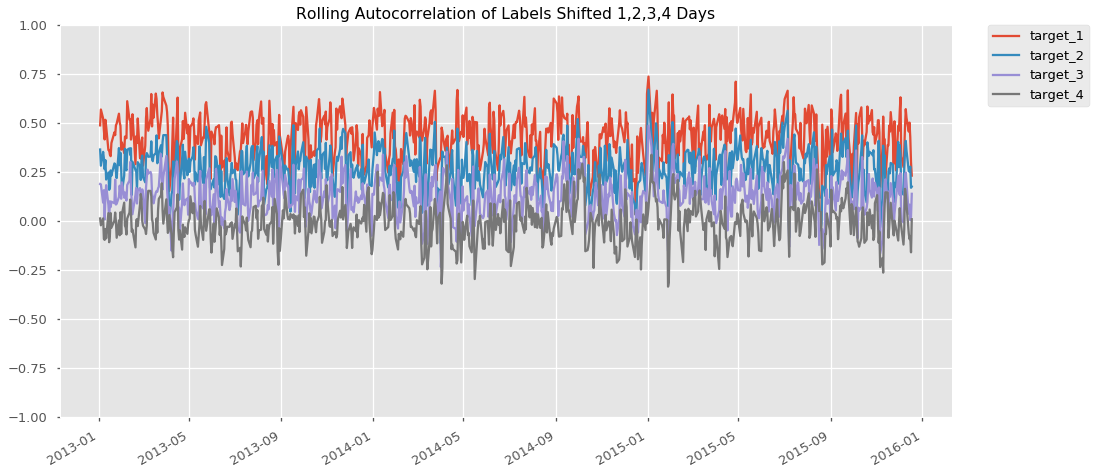

In [12]:
def sp(group, col1_name, col2_name):
    x = group[col1_name]
    y = group[col2_name]
    return spearmanr(x, y)[0]


targets_df['target_p'] = targets_df.groupby(level=1)['return_5d_5p'].shift(-5)
targets_df['target_1'] = targets_df.groupby(level=1)['return_5d'].shift(-4)
targets_df['target_2'] = targets_df.groupby(level=1)['return_5d'].shift(-3)
targets_df['target_3'] = targets_df.groupby(level=1)['return_5d'].shift(-2)
targets_df['target_4'] = targets_df.groupby(level=1)['return_5d'].shift(-1)

g = targets_df.dropna().groupby(level=0)
for i in range(4):
    label = 'target_'+str(i+1)
    ic = g.apply(sp, 'target', label)
    ic.plot(ylim=(-1, 1), label=label)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title('Rolling Autocorrelation of Labels Shifted 1,2,3,4 Days')
plt.show()

The longer the shift period the lower the correlation, this means that it is more difficult to forecast longer time periods. Moreover, in full data, target overlapping creates non-independent observations

### Train Random Forests with Different Tree Sizes
Let's build models using different tree sizes to find the model that best generalizes.
#### Parameters
When building the models, we'll use the following parameters.

# Model Building

In [13]:
n_days = 5
n_stocks = 500
clf_random_state = 123
clf_parameters = ParameterGrid({
    'min_samples_leaf': [n_stocks * n_days],
    'n_estimators': [50 , 100, 250, 500],
    'criterion': ['entropy'],
    'oob_score': [True],
    'n_jobs': [-1],
    'random_state': [clf_random_state]})

To choose *min_samples_leaf* parameter  a first apporximation is to set a number that allow full stocks universe to fit in a leaf, let's say 500. This does not ensure that in a given leaf, a symbol is not repeated (rows from different days). 

In addition this number may be multiplied by a *number of days*, creating a leaf size: min_samples_leaf = n_stocks * n_days

A good rule of thumb for what is considered “too good to be true”, and therefore a sign of overfitting, is if the sharpe ratio is greater than 4.  Based on this, we recommend using min_sampes_leaf of 10 * 500, or 5,000.

In [14]:
simple_clf = DecisionTreeClassifier(
    min_samples_leaf=n_stocks * n_days,
    criterion='entropy',
    random_state=clf_random_state)
simple_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [15]:
tree = simple_clf.tree_

In [16]:
n_nodes = simple_clf.tree_.node_count
children_left = simple_clf.tree_.children_left
children_right = simple_clf.tree_.children_right
feature = simple_clf.tree_.feature
threshold = simple_clf.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

In [17]:
node_depth.max()

12

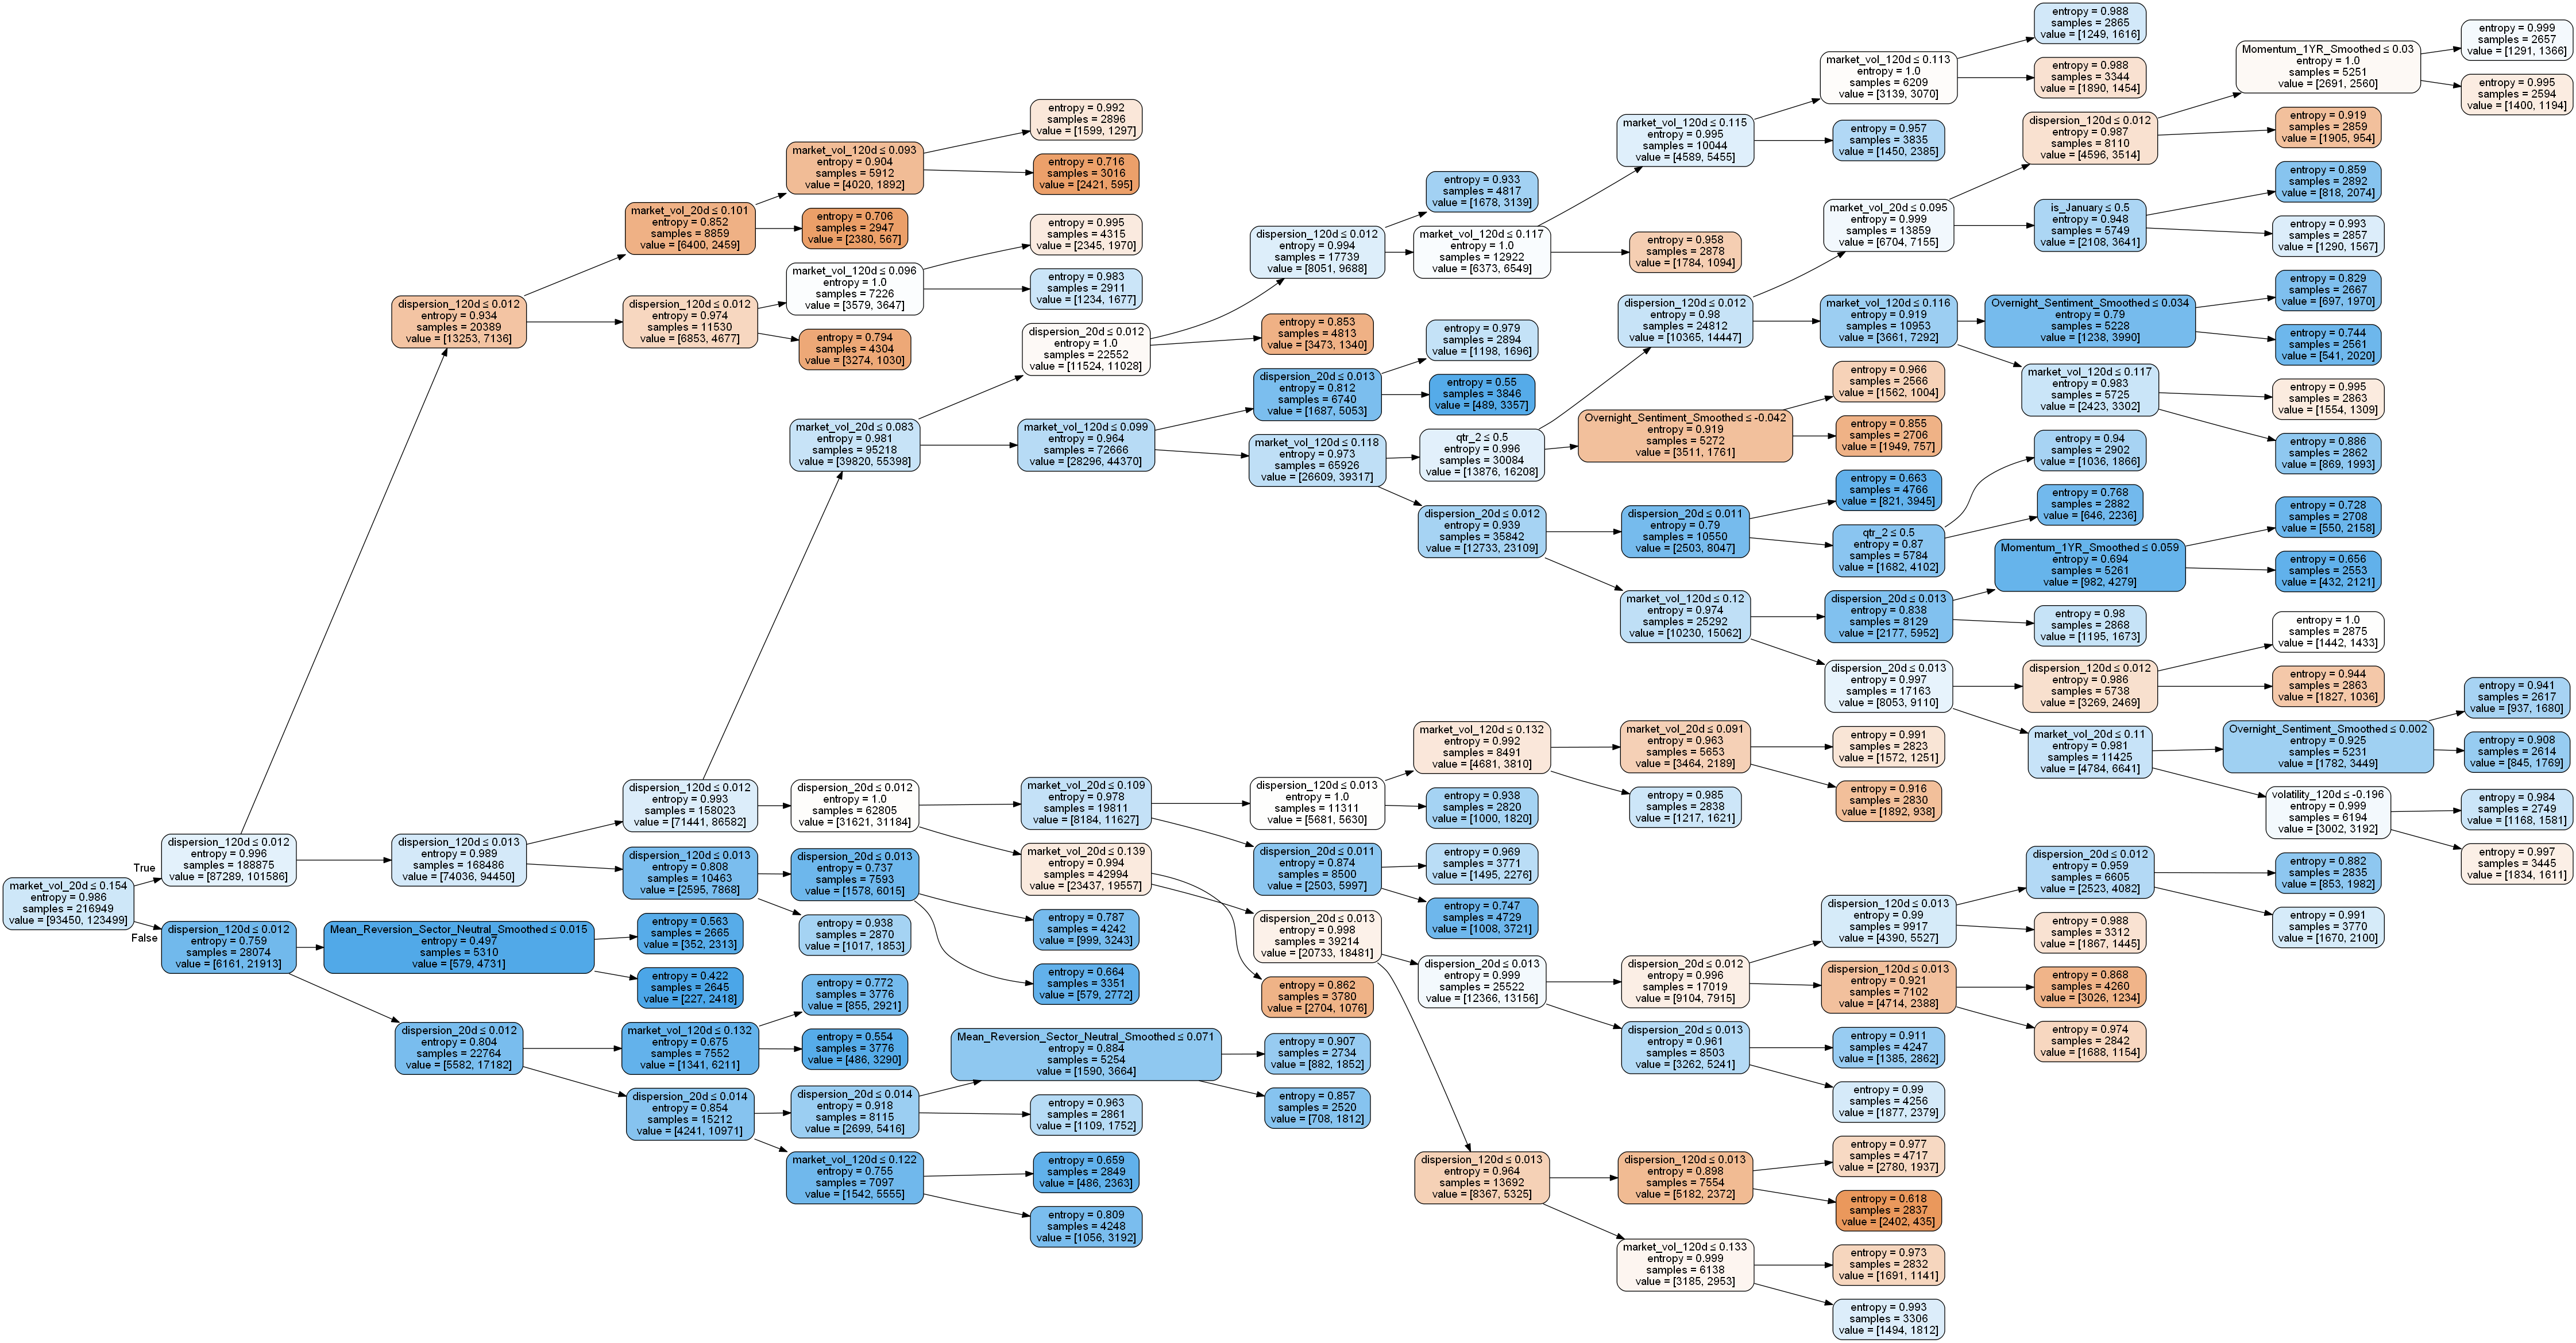

In [18]:
from IPython.display import display

display(project_helper.plot_tree_classifier(simple_clf, feature_names=features))

## Raw Random Forest

In [19]:
clf_raw = RandomForestClassifier()
raw_models, raw_results = mle_utils.rf_train_val_grid_search(clf_raw, clf_parameters, X_train, y_train, X_valid, y_valid)

Training Models: 100%|██████████| 4/4 [01:55<00:00, 28.87s/Model]


In [20]:
raw_results

,train_pmean,train_score,valid_pmean,valid_score,oob_score,criterion,min_samples_leaf,n_estimators,n_jobs,oob_score_hp,random_state
0,0.780506,0.655057,0.981107,0.55898,0.649314,entropy,2500,50,-1,True,123
1,0.77586,0.656477,0.983819,0.560977,0.652988,entropy,2500,100,-1,True,123
2,0.778625,0.656919,0.979124,0.560082,0.654393,entropy,2500,250,-1,True,123
3,0.774781,0.655112,0.948732,0.556515,0.654066,entropy,2500,500,-1,True,123


C:\ProgramData\Anaconda3\envs\quant-ai4trading\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


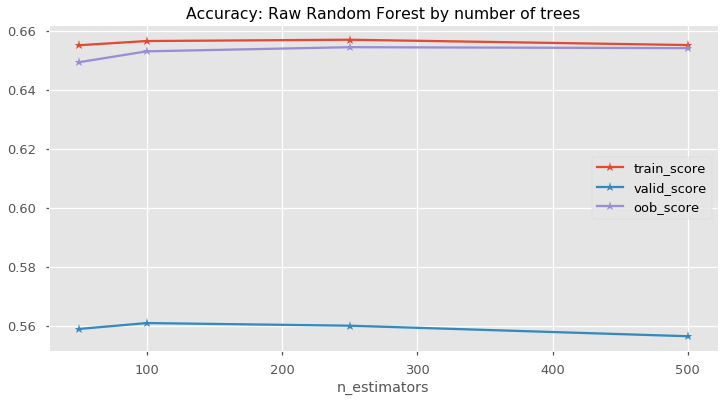

In [21]:
raw_results.plot(y=['train_score', 'valid_score','oob_score'], x='n_estimators', marker='*', figsize=(12, 6))
plt.title("Accuracy: Raw Random Forest by number of trees")
plt.show()

At first glance, exploring accuracy by number of random forests does not vary much when increasing number of trees, RandomForest n_estimators params is not prone to overfit, it is just inefficient to increase the number of trees.

In [22]:
raw_mod_select = raw_models[1]

### Feature Importance

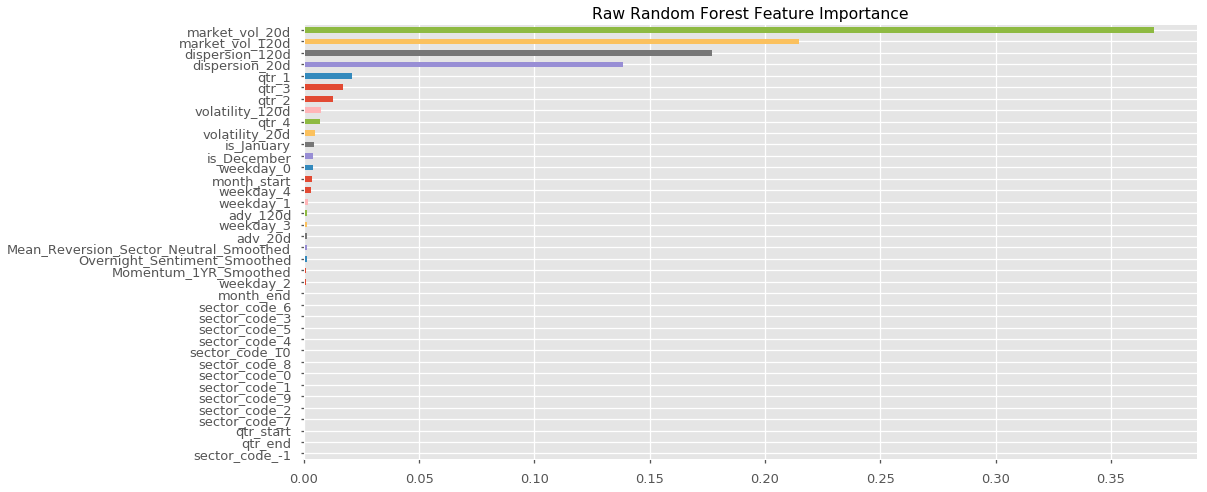

In [23]:
feat_imp_df = feature_importance = pd.Series(index=features, data=raw_mod_select.feature_importances_, name='sklearn_imp')
feat_imp_df.sort_values().plot.barh()
plt.title('Raw Random Forest Feature Importance')
plt.show()

Splits are based on impurity reduction, that's it, select the feature-split that greedly yields a greater impurity reduction. When the tree is fully grown, node importances are computed and lower nodes tend to accomplish a greater importance due to better splitting capability, therefore, features used in that later nodes tend to be more important in this calculation


### Combined ML-Factor Evaluation

In [24]:
factor_names = [
    'Mean_Reversion_Sector_Neutral_Smoothed',
    'Momentum_1YR_Smoothed',
    'Overnight_Sentiment_Smoothed',
    'adv_120d',
    'volatility_20d']

In [25]:
all_assets = all_factors.index.levels[1].values.tolist()
all_pricing = quant_helper.get_pricing(
    data_portal,
    trading_calendar,
    all_assets,
    factor_start_date,
    universe_end_date)

C:\Users\manua\Documents\repos\dslab_ai4trading\alpha_factors\mle_quant_utils\quant_helper.py:54: FutureWarning: offset is deprecated. Use freq instead
  end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
C:\Users\manua\Documents\repos\dslab_ai4trading\alpha_factors\mle_quant_utils\quant_helper.py:55: FutureWarning: offset is deprecated. Use freq instead
  start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')


In [26]:
train_sharpe_ratio, train_factor_cum_rets, tra_factor_fra = project_helper.get_sample_results(all_factors, X_train, raw_mod_select, factor_names, all_pricing, periods = 5)
valid_sharpe_ratio, valid_factor_cum_rets, valid_factor_fra = project_helper.get_sample_results(all_factors, X_valid, raw_mod_select, factor_names, all_pricing, periods = 5)

Cleaning Data...

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

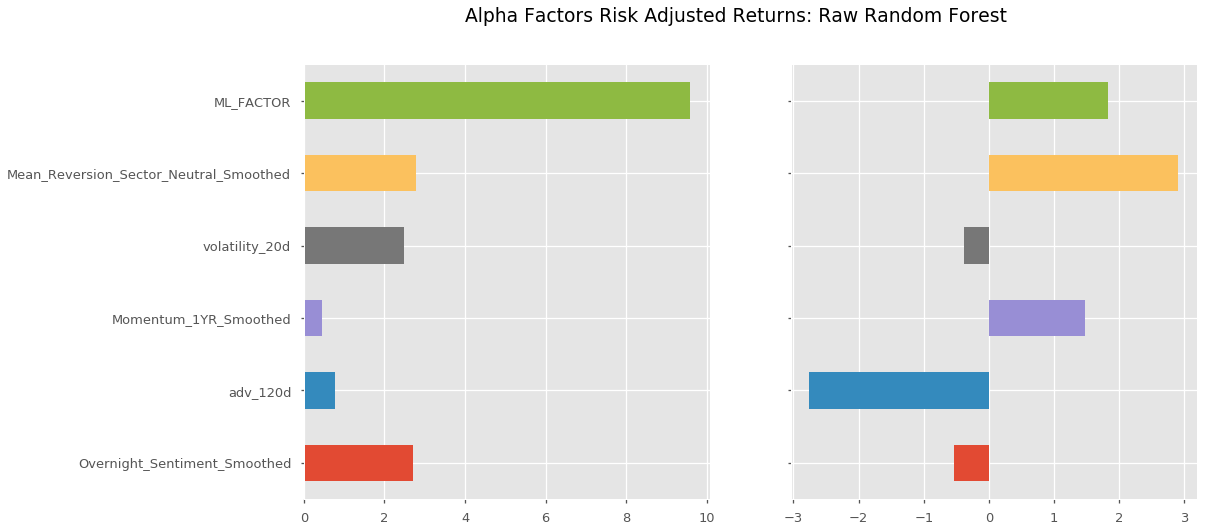

In [27]:
fig, axs = plt.subplots(1, 2, sharey=True)
ax1, ax2 = axs
train_sharpe_ratio.plot.barh(ax=ax1)
valid_sharpe_ratio.plot.barh(ax=ax2)
plt.suptitle("Alpha Factors Risk Adjusted Returns: Raw Random Forest")
plt.show()

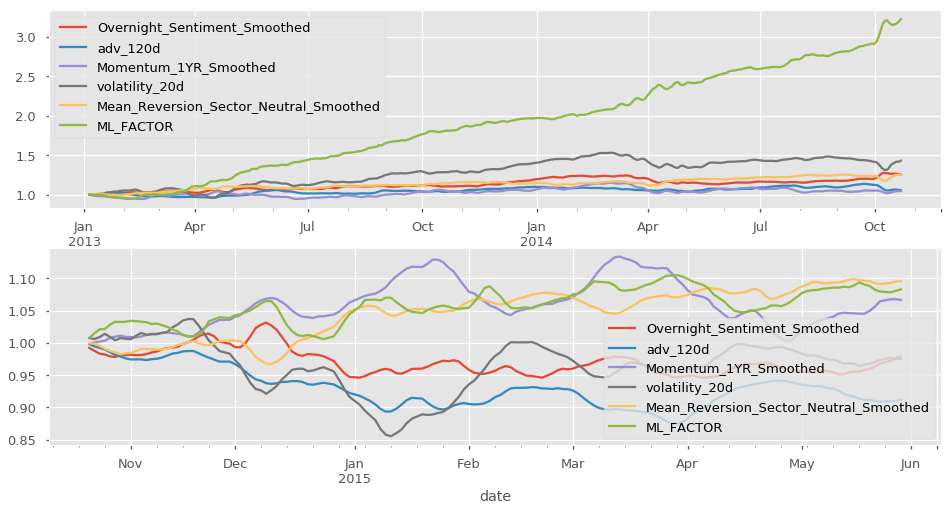

In [28]:
fig, axs = plt.subplots(2, 1)
ax1, ax2 = axs

train_factor_cum_rets.plot(ax=ax1)
valid_factor_cum_rets.plot(ax=ax2)

plt.show()

If instead of analyzing classification accuracy, a combined alpha factor is yielded from model predictions (probabilities mapped to -1, +1) and factor returns are calculated. It can be seen that on training data, sharpe ratio is too good to be true and in validation data, it is not the best alpha factor. Let's analyze the impact of model design